In [1]:
import torch
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from myDataSet import *
from myNetworks import *
from myUtil import *
from tqdm import tqdm

In [2]:
# TODO: Implement GPU memory alloc in case of CUDA
# TODO: enable parallel GPU computation

In [6]:
# Set up the dataset.
image_directory = "Insects"
annotations_file_directory = "insects.csv"
image_dims = (520,520)
my_transform = torchvision.transforms.Resize(image_dims)
dataset = MyCustomImageDataset(annotations_file_dir=annotations_file_directory,
                               image_directory_path=image_directory,
                               transform=my_transform)

# Preparing data for learning (normalization, one-hot encoding and batching)
my_batch_size, my_data_fraction, my_test_fraction, my_validation_fraction = 4, 1, 0.2, 0.3
prepped_data = DataPrep(dataset=dataset,
                        batch_size=my_batch_size,
                        data_fraction=my_data_fraction,
                        test_fraction=my_test_fraction,
                        validation_fraction=my_validation_fraction)

my_X_train_batches, my_Y_train_batches = prepped_data.train_X, prepped_data.train_Y
my_X_validation_batches, my_Y_validation_batches = prepped_data.validation_X, prepped_data.validation_Y
print("Shape of single X batch: ",tuple(my_X_train_batches[0].shape))

Initial nr. of batches:  181
Nr. batches after 'data_fraction' splitting:  181
Nr. batches set aside for testing:  36
Nr. batches set aside for validation:  29
Nr. batches remaining for training:  116
Shape of single X batch:  (4, 3, 520, 520)


In [7]:
# Creating instance of neural network
my_nr_channels = my_X_train_batches[0].shape[1]
my_nr_classes = my_Y_train_batches[0].shape[1]
my_input_dimensions = (my_X_train_batches[0].shape[2], my_X_train_batches[0].shape[3])

my_net = NeuralNet2(channels_in=my_nr_channels,
                   nr_classes=my_nr_classes,
                   input_dimensions=my_input_dimensions)

In [8]:
my_nr_epochs = 30
train_accuracies, train_losses, validation_accuracies, validation_losses = my_net.train_network(
                                                        train_data_batches=my_X_train_batches,
                                                      train_labels_batches=my_Y_train_batches,
                                                   validation_data_batches=my_X_validation_batches,
                                                 validation_labels_batches=my_Y_validation_batches,
                                                                    epochs=my_nr_epochs,
                                                               device_name='cuda')

Current torch cuda version:  11.6
Cuda devices found by torch:  2
Current cuda device to be used by torch:  0
Name of cuda device:  NVIDIA GeForce RTX 3060
Total memory in cuda device:  12637.110272 MB
Total memory reserved in cuda device:  3623.878656 MB
Total memory allocated in cuda device:  1976.126976 MB
Total remaining memory in cuda device::  9013.231616 MB


  3%|▎         | 1/30 [00:07<03:24,  7.05s/it]

Model saved at epoch:  1 , with validation acc:  45.689655172413794 %


  7%|▋         | 2/30 [00:14<03:17,  7.05s/it]

Model saved at epoch:  2 , with validation acc:  47.41379310344828 %


 10%|█         | 3/30 [00:21<03:10,  7.07s/it]

Model saved at epoch:  3 , with validation acc:  51.724137931034484 %


 13%|█▎        | 4/30 [00:28<03:03,  7.07s/it]

Model saved at epoch:  4 , with validation acc:  54.310344827586206 %


 17%|█▋        | 5/30 [00:35<02:56,  7.08s/it]

Model saved at epoch:  5 , with validation acc:  56.896551724137936 %


 20%|██        | 6/30 [00:42<02:49,  7.08s/it]

Model saved at epoch:  6 , with validation acc:  63.793103448275865 %


 23%|██▎       | 7/30 [00:49<02:42,  7.08s/it]

Model saved at epoch:  7 , with validation acc:  69.82758620689656 %


 27%|██▋       | 8/30 [00:56<02:35,  7.08s/it]

Model saved at epoch:  8 , with validation acc:  79.3103448275862 %


 30%|███       | 9/30 [01:03<02:28,  7.08s/it]

Model saved at epoch:  9 , with validation acc:  81.89655172413794 %


 33%|███▎      | 10/30 [01:10<02:21,  7.08s/it]

Model saved at epoch:  10 , with validation acc:  83.62068965517241 %


 37%|███▋      | 11/30 [01:17<02:14,  7.08s/it]

Model saved at epoch:  11 , with validation acc:  85.34482758620689 %


 40%|████      | 12/30 [01:24<02:07,  7.08s/it]

Model saved at epoch:  12 , with validation acc:  86.20689655172413 %


 43%|████▎     | 13/30 [01:31<02:00,  7.08s/it]

Model saved at epoch:  13 , with validation acc:  87.06896551724138 %


 50%|█████     | 15/30 [01:46<01:46,  7.07s/it]

Model saved at epoch:  15 , with validation acc:  87.93103448275862 %


 53%|█████▎    | 16/30 [01:53<01:39,  7.08s/it]

Model saved at epoch:  16 , with validation acc:  88.79310344827587 %


 70%|███████   | 21/30 [02:28<01:03,  7.05s/it]

Model saved at epoch:  21 , with validation acc:  89.65517241379311 %


 77%|███████▋  | 23/30 [02:42<00:49,  7.06s/it]

Model saved at epoch:  23 , with validation acc:  91.37931034482759 %


100%|██████████| 30/30 [03:31<00:00,  7.05s/it]


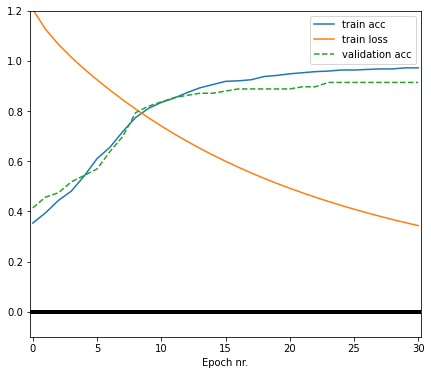

In [9]:
fig, ax = plt.subplots(1,1,figsize=(7,6))
epochs = [i for i in range(len(train_accuracies))]
ax.plot(epochs,train_accuracies,label="train acc")
ax.plot(epochs,train_losses,label="train loss")
ax.plot(epochs,validation_accuracies,ls='--',label="validation acc")
#ax.plot(epochs,test_losses,label="test loss")
ax.set_ylim(-0.1,1.2)
ax.set_xlim(-0.2,my_nr_epochs+0.2)
ax.hlines(0,-0.2,my_nr_epochs+0.2,lw=4,color="k")
ax.set_xlabel("Epoch nr.")
ax.legend(loc=1)
plt.show()

In [10]:
test_model(my_net,prepped_data)

Testing model on all available test batches..

 #####|  137 / 144  items in  36  test batches predicted correctly ~ acc:  0.9514  |#####
